## Quantum Machine Learning

Quantum Machine Learning combines quantum computing with machine learning algorithms to potentially solve complex problems more efficiently than classical algorithms. QML leverages the principles of quantum mechanics, such as superposition and entanglement, to enhance data processing capabilities.

#### 🔍 Why is Quantum Machine Learning important?
QML holds the promise of revolutionizing fields such as data science, artificial intelligence, and big data analytics by offering faster and more efficient ways to analyze vast datasets and uncover hidden patterns.

One key application of QML is in the area of classification, where we can use quantum algorithms to distinguish between different classes of data. Today, we'll explore a basic quantum machine learning algorithm: the Quantum Support Vector Machine (QSVM).

Below is a simple example in Qiskit to demonstrate a QSVM for binary classification.

In this example, we use the Qiskit Machine Learning package to implement a Variational Quantum Classifier (VQC).

##### Import necessary libraries

In [30]:
# Import necessary libraries
from qiskit import QuantumCircuit
from qiskit.circuit.library import RealAmplitudes
from qiskit.primitives import Sampler
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit_machine_learning.datasets import ad_hoc_data
from qiskit_aer import AerSimulator
from qiskit_algorithms.optimizers import COBYLA
import matplotlib.pyplot as plt
from qiskit.circuit import ParameterVector
import numpy as np

%matplotlib inline

##### Data Generation 
Here, we use the `ad_hoc_data ` function to generate synthetic data for a binary classification problem.

In [31]:
feature_dim = 2
training_size = 20
testing_size = 10

training_features, training_labels, testing_features, testing_labels = ad_hoc_data(
    training_size=training_size,
    test_size=testing_size,
    n=feature_dim,
    gap=0.3,
    plot_data=False
)

##### Process data


In [32]:
# Ensure input data is in the correct format
training_features = np.array(training_features)
training_labels = np.array(training_labels)
testing_features = np.array(testing_features)
testing_labels = np.array(testing_labels)

##### Feature map definition
We define a feature map and a variational circuit using the  `ParameterVector ` circuit from Qiskit's circuit library.

In [33]:
# Define custom feature map and variational circuit
def create_feature_map(feature_dim):
    qc = QuantumCircuit(feature_dim)
    feature_params = ParameterVector('x', feature_dim)
    for i in range(feature_dim):
        qc.rx(feature_params[i], i)
    return qc

def create_var_circuit(feature_dim):
    qc = QuantumCircuit(feature_dim)
    var_params = ParameterVector('θ', feature_dim)
    for i in range(feature_dim):
        qc.ry(var_params[i], i)
    return qc

feature_map = create_feature_map(feature_dim)
var_circuit = create_var_circuit(feature_dim)

##### Define Optimizer
We use the `COBYLA `  optimizer from `qiskit_algorithms ` for training the variational circuit.

In [34]:
# Define optimizer
optimizer = COBYLA(maxiter=100)

##### Define  Sampler 
We use the `Sampler ` primitive to sample from the quantum circuits.

In [35]:
# Create Sampler primitive
sampler = Sampler()

##### Define  VQC

In [36]:
# Define VQC
vqc = VQC(
    feature_map=feature_map,
    ansatz=var_circuit,
    optimizer=optimizer,
    sampler=sampler
)

##### Train VQC
The VQC is trained on the training data using the feature map and variational circuit.

In [37]:
# Train VQC
vqc.fit(training_features, training_labels)

##### Predict
The trained VQC predicts labels for the test data

In [38]:
# Predict
predicted_labels = vqc.predict(testing_features)

##### Evaluate
Calculate the accuracy of the model.

In [39]:
# Evaluate
accuracy = vqc.score(testing_features, testing_labels)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.35


#### Visualize decision boundary
We visualize the training data used in the VQC.

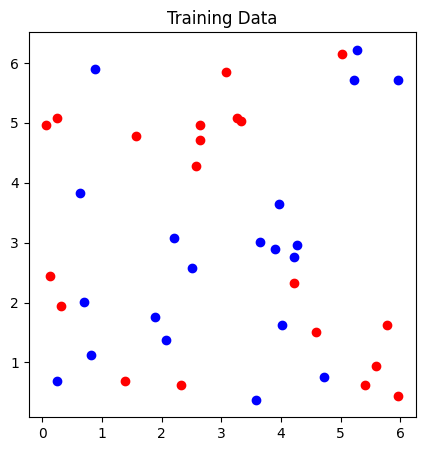

In [40]:
# Visualize the decision boundary
plt.figure(figsize=(5, 5))
for feature, label in zip(training_features, training_labels):
    # Ensure label is a scalar by accessing the first element if it's an array
    label = label[0] if isinstance(label, np.ndarray) else label
    color = 'r' if label == 0 else 'b'
    plt.scatter(feature[0], feature[1], c=color, marker='o')
plt.title("Training Data")
plt.show()

##### Visualize quantum circuit
We visualize the quantum circuits used in the VQC.

Feature Map Circuit:
Variational Circuit:


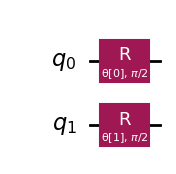

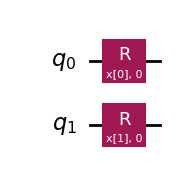

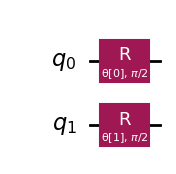

In [41]:
# Visualize quantum circuits
print("Feature Map Circuit:")
feature_map.decompose().draw('mpl') 

print("Variational Circuit:")
var_circuit.decompose().draw('mpl') 